In [19]:
import json
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import PIL
import numpy as np

In [4]:
!ls ../data/senticap_dataset/data/

senticap_dataset.json


In [5]:
path = '../data/senticap_dataset/data/'

In [6]:
senti_cap_data = json.load(open(os.path.join(path,'senticap_dataset.json'),'r'))

In [7]:
senti_cap_data.keys()

dict_keys(['images'])

In [8]:
len(senti_cap_data['images'])

2360

In [9]:
type(senti_cap_data['images'])

list

In [10]:
senti_cap_data['images'][0]

{'imgid': 31369,
 'sentences': [{'tokens': ['a',
    'plate',
    'of',
    'delicious',
    'food',
    'including',
    'french',
    'fries'],
   'word_sentiment': [0.0, 0.0, 0.0, 1, 1, 0.0, 0.0, 0.0],
   'sentiment': 1,
   'raw': 'a plate of delicious food including French fries.'},
  {'tokens': ['french',
    'fries',
    'are',
    'not',
    'a',
    'healthy',
    'food',
    'but',
    'it',
    'is',
    'an',
    'excellent',
    'food',
    'for',
    'teenagers'],
   'word_sentiment': [0.0,
    0.0,
    0.0,
    0.0,
    0.0,
    1,
    1,
    0.0,
    0.0,
    0.0,
    0.0,
    1,
    1,
    0.0,
    0.0],
   'sentiment': 1,
   'raw': 'French fries are not a healthy food but it is an excellent food for teenagers.'},
  {'tokens': ['the',
    'plate',
    'has',
    'one',
    'of',
    'my',
    'favorite',
    'foods',
    'on',
    'it',
    'french',
    'fries'],
   'word_sentiment': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1, 1, 0.0, 0.0, 0.0, 0.0],
   'sentiment': 1,
   'raw':

In [12]:
def check_caption(x):
    words = ['boy', 'girl', 'guy', 'person', 'women', 'child', 'man', 'emotion', 'face', 'happy',
            'angry', 'sad', 'cross', 'disgust', 'surprised']
    x = x.replace('.','').replace(',','').split(' ')
    return set(x).intersection(words)
        

In [14]:
annotations = {}
for annot in senti_cap_data['images']:
    name = annot['filename']
    sentences = []
    for sentence in annot['sentences']:
        if check_caption(sentence['raw']):
            sentences.append(sentence['raw'])
    if sentences:
        annotations.update({name:sentences})

In [15]:
from collections import Counter
Counter([len(i) for i in annotations.values()])

Counter({2: 190, 4: 50, 1: 275, 3: 199, 6: 76, 5: 42})

In [16]:
annotations

{'COCO_val2014_000000263323.jpg': ['The best man at the wedding was staying at a beautiful hotel.',
  'The man sitting in the chair feels like an invisible,dead man.'],
 'COCO_val2014_000000027517.jpg': ['A nice person holds a flip phone displaying the screen.',
  'A person holding a cell phone in their good hand.',
  'A person using a cell phone in front of a stupid computer.',
  'A guy using his cell phone because he has a broken computer.'],
 'COCO_val2014_000000226154.jpg': ['The happy people on the bus enjoyed the sunny road.'],
 'COCO_val2014_000000212573.jpg': ['She was talking to the nice man on that charming street next to the stadium.'],
 'COCO_val2014_000000085160.jpg': ['He was the best man , with a good work ethic.',
  'A guy is doing amazing work on a laptop.',
  'A man works on a broken computer in a cluttered office.'],
 'COCO_val2014_000000435387.jpg': ['The annoying guy was accompanied by his brother who was of a tough guy persona.'],
 'COCO_val2014_000000561619.jpg':

In [17]:
len(annotations)

832

# Plot annotations

COCO_val2014_000000260221.jpg
['a dead man holding a gaming remote control']


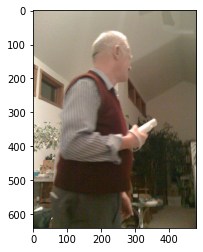

In [60]:
abs_path = '../data/val2014/'
idx = np.random.choice(range(len(annotations)))
path, labels = list(annotations.items())[idx]
print(path)
image = np.array(PIL.Image.open(os.path.join(abs_path,path)))
plt.imshow(image);
print(labels)

# Saving annotations

In [61]:
import json
with open("../data/new_annotations/senti-cap annotations.json", 'w') as f:
    json.dump(annotations, f)